# ChumakNA_HW4

# Домашнее задание


1. Выгрузить обороты по регистру бухгалтерии за год помесячно по одной организации по трем бухгалтерским счетам
без аналитики в excel или в csv.
2. Загрузить эти данные в pandas DataFrame
3. Преобразовать суммы в числовой тип, а период в тип datetime
4. Сформировать новый dataframe, где суммы по счетам учета будут в колонках аналогично статьям в примере лекции
5. Отсортировать полученную таблицу по периоду
6. Вывести график по одному из счетов


Если нет доступа к 1с бухгалтерии, можно взять любой другой аналогичный dataset


In [3]:
import numpy as np
import pandas as pd
import datetime
import time

In [4]:
a = ('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-chumak/99_different/budget_3.xlsx')

In [5]:
df = pd.read_excel(a)
df.head()

,Период,Сценарий,СтатьяОборотов,Сумма
0,2021-07-01,ФАКТ,Выручка,3651905.77
1,2021-09-01,ФАКТ,Выручка,3651904.57
2,2021-12-01,ФАКТ,Выручка,3645905.77
3,2021-02-01,ФАКТ,Выручка,3451905.77
4,2021-10-01,ФАКТ,Выручка,3351905.77


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Период          56 non-null     datetime64[ns]
 1   Сценарий        56 non-null     object        
 2   СтатьяОборотов  56 non-null     object        
 3   Сумма           56 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.9+ KB


In [7]:
df_grouped = df.groupby(['Период', 'Сценарий'], as_index=False).sum()
df_grouped.drop('Сумма', axis=1, inplace=True)
df_grouped.head()

,Период,Сценарий
0,2021-01-01,ПЛАН
1,2021-01-01,ФАКТ
2,2021-02-01,ПЛАН
3,2021-02-01,ФАКТ
4,2021-03-01,ПЛАН


In [8]:
df['СтатьяОборотов'].unique()

array(['Выручка', 'Выплата ЗП', 'Расходы на рекламу'], dtype=object)

In [9]:
df['СтатьяОборотов'].value_counts()

Выручка               24
Выплата ЗП            23
Расходы на рекламу     9
Name: СтатьяОборотов, dtype: int64

In [10]:
df_item_1 = df.loc[df['СтатьяОборотов'] =='Выручка']
df_item_1.head()

,Период,Сценарий,СтатьяОборотов,Сумма
0,2021-07-01,ФАКТ,Выручка,3651905.77
1,2021-09-01,ФАКТ,Выручка,3651904.57
2,2021-12-01,ФАКТ,Выручка,3645905.77
3,2021-02-01,ФАКТ,Выручка,3451905.77
4,2021-10-01,ФАКТ,Выручка,3351905.77


In [11]:
df_result_1 = df_grouped.merge(df_item_1, on=['Период', 'Сценарий'], how='left')
df_result_1.head()

,Период,Сценарий,СтатьяОборотов,Сумма
0,2021-01-01,ПЛАН,Выручка,1567500.00
1,2021-01-01,ФАКТ,Выручка,3086708.57
2,2021-02-01,ПЛАН,Выручка,627341.75
3,2021-02-01,ФАКТ,Выручка,3451905.77
4,2021-03-01,ПЛАН,Выручка,615935.53


In [12]:
df_result_1.rename({'Сумма': 'Выручка'}, axis=1, inplace=True)
df_result_1.head()

,Период,Сценарий,СтатьяОборотов,Выручка
0,2021-01-01,ПЛАН,Выручка,1567500.00
1,2021-01-01,ФАКТ,Выручка,3086708.57
2,2021-02-01,ПЛАН,Выручка,627341.75
3,2021-02-01,ФАКТ,Выручка,3451905.77
4,2021-03-01,ПЛАН,Выручка,615935.53


In [13]:
df_result_1.drop('СтатьяОборотов', axis=1, inplace=True)
df_result_1.head()

,Период,Сценарий,Выручка
0,2021-01-01,ПЛАН,1567500.00
1,2021-01-01,ФАКТ,3086708.57
2,2021-02-01,ПЛАН,627341.75
3,2021-02-01,ФАКТ,3451905.77
4,2021-03-01,ПЛАН,615935.53


In [14]:
df_item_2 = df.loc[df['СтатьяОборотов']=='Выплата ЗП']
df_result_2 = df_result_1.merge(df_item_2, on=['Период', 'Сценарий'], how='left')
df_result_2.head()

,Период,Сценарий,Выручка,СтатьяОборотов,Сумма
0,2021-01-01,ПЛАН,1567500.00,Выплата ЗП,570310.68
1,2021-01-01,ФАКТ,3086708.57,Выплата ЗП,627341.75
2,2021-02-01,ПЛАН,627341.75,Выплата ЗП,570310.68
3,2021-02-01,ФАКТ,3451905.77,Выплата ЗП,627341.75
4,2021-03-01,ПЛАН,615935.53,Выплата ЗП,570310.68


In [15]:
df_result_2.rename({'Сумма': 'Выплата ЗП'}, axis=1, inplace=True)
df_result_2.drop('СтатьяОборотов', axis=1, inplace=True)
df_result_2.head()

,Период,Сценарий,Выручка,Выплата ЗП
0,2021-01-01,ПЛАН,1567500.00,570310.68
1,2021-01-01,ФАКТ,3086708.57,627341.75
2,2021-02-01,ПЛАН,627341.75,570310.68
3,2021-02-01,ФАКТ,3451905.77,627341.75
4,2021-03-01,ПЛАН,615935.53,570310.68


In [16]:
df_item_3 = df.loc[df['СтатьяОборотов']=='Расходы на рекламу']
df_result_3 = df_result_2.merge(df_item_3, on=['Период', 'Сценарий'], how='left')
df_result_3.head()

,Период,Сценарий,Выручка,Выплата ЗП,СтатьяОборотов,Сумма
0,2021-01-01,ПЛАН,1567500.00,570310.68,Расходы на рекламу,228000.0
1,2021-01-01,ФАКТ,3086708.57,627341.75,Расходы на рекламу,246240.0
2,2021-02-01,ПЛАН,627341.75,570310.68,Расходы на рекламу,250800.0
3,2021-02-01,ФАКТ,3451905.77,627341.75,Расходы на рекламу,246240.0
4,2021-03-01,ПЛАН,615935.53,570310.68,Расходы на рекламу,246240.0


In [17]:
df_result_3.rename({'Сумма': 'Расходы на рекламу'}, axis=1, inplace=True)
df_result_3.drop('СтатьяОборотов', axis=1, inplace=True)
df_result_3

,Период,Сценарий,Выручка,Выплата ЗП,Расходы на рекламу
0,2021-01-01,ПЛАН,1567500.00,570310.68,228000.0
1,2021-01-01,ФАКТ,3086708.57,627341.75,246240.0
2,2021-02-01,ПЛАН,627341.75,570310.68,250800.0
3,2021-02-01,ФАКТ,3451905.77,627341.75,246240.0
4,2021-03-01,ПЛАН,615935.53,570310.68,246240.0
5,2021-03-01,ФАКТ,361905.77,627341.75,246240.0
6,2021-04-01,ПЛАН,1318660.23,570310.68,NaN
7,2021-04-01,ФАКТ,287338.34,627341.75,NaN
8,2021-05-01,ПЛАН,1560030.46,570310.68,NaN
9,2021-05-01,ФАКТ,1651905.76,627341.75,NaN


In [18]:
df_result_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Период              24 non-null     datetime64[ns]
 1   Сценарий            24 non-null     object        
 2   Выручка             24 non-null     float64       
 3   Выплата ЗП          23 non-null     float64       
 4   Расходы на рекламу  9 non-null      float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 1.1+ KB


In [19]:
df_f = df_result_3.apply(lambda x: x.fillna(0))
df_f

,Период,Сценарий,Выручка,Выплата ЗП,Расходы на рекламу
0,2021-01-01,ПЛАН,1567500.00,570310.68,228000.0
1,2021-01-01,ФАКТ,3086708.57,627341.75,246240.0
2,2021-02-01,ПЛАН,627341.75,570310.68,250800.0
3,2021-02-01,ФАКТ,3451905.77,627341.75,246240.0
4,2021-03-01,ПЛАН,615935.53,570310.68,246240.0
5,2021-03-01,ФАКТ,361905.77,627341.75,246240.0
6,2021-04-01,ПЛАН,1318660.23,570310.68,0.0
7,2021-04-01,ФАКТ,287338.34,627341.75,0.0
8,2021-05-01,ПЛАН,1560030.46,570310.68,0.0
9,2021-05-01,ФАКТ,1651905.76,627341.75,0.0


In [20]:
df_fin = df_f.sort_values('Период')
df_fin

,Период,Сценарий,Выручка,Выплата ЗП,Расходы на рекламу
0,2021-01-01,ПЛАН,1567500.00,570310.68,228000.0
1,2021-01-01,ФАКТ,3086708.57,627341.75,246240.0
2,2021-02-01,ПЛАН,627341.75,570310.68,250800.0
3,2021-02-01,ФАКТ,3451905.77,627341.75,246240.0
4,2021-03-01,ПЛАН,615935.53,570310.68,246240.0
5,2021-03-01,ФАКТ,361905.77,627341.75,246240.0
6,2021-04-01,ПЛАН,1318660.23,570310.68,0.0
7,2021-04-01,ФАКТ,287338.34,627341.75,0.0
8,2021-05-01,ПЛАН,1560030.46,570310.68,0.0
9,2021-05-01,ФАКТ,1651905.76,627341.75,0.0


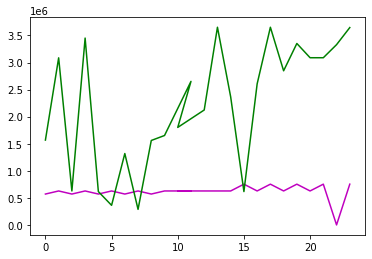

In [21]:
df_fin['Выплата ЗП'].plot(color='m')
df_fin['Выручка'].plot(color='g')

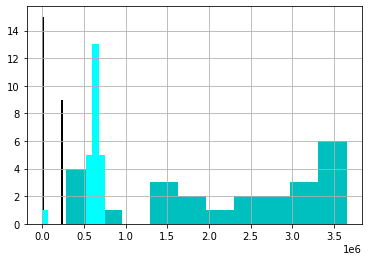

In [22]:
df_fin['Выручка'].hist(color='c')
df_fin['Расходы на рекламу'].hist(color='k')
df_fin['Выплата ЗП'].hist(color='cyan')

# Попытка вывести круговую диаграмму


1. Не смогла понять, как победить ошибку при выводе значения года в отдельный столбец.
2. Посчитала total по ФАКТу по каждому виду ДДС.
3. Не поняла, как вывести диаграмму непосредственно на основе df.

In [23]:
df_fin_q = df_fin.query('Сценарий == "ФАКТ"') 
df_fin_q

,Период,Сценарий,Выручка,Выплата ЗП,Расходы на рекламу
1,2021-01-01,ФАКТ,3086708.57,627341.75,246240.0
3,2021-02-01,ФАКТ,3451905.77,627341.75,246240.0
5,2021-03-01,ФАКТ,361905.77,627341.75,246240.0
7,2021-04-01,ФАКТ,287338.34,627341.75,0.0
9,2021-05-01,ФАКТ,1651905.76,627341.75,0.0
11,2021-06-01,ФАКТ,2651905.77,627341.75,0.0
13,2021-07-01,ФАКТ,3651905.77,627341.75,0.0
15,2021-08-01,ФАКТ,615935.53,752810.10,0.0
17,2021-09-01,ФАКТ,3651904.57,752810.10,0.0
19,2021-10-01,ФАКТ,3351905.77,752810.10,0.0


In [28]:
df_fin_q['Год'] = df_fin_q['Период'].dt.strftime('%Y')
df_fin_q

#Не смогла понять, как победить ошибку при выводе значения года в отдельный столбец.

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Период,Сценарий,Выручка,Выплата ЗП,Расходы на рекламу,Год
1,2021-01-01,ФАКТ,3086708.57,627341.75,246240.0,2021
3,2021-02-01,ФАКТ,3451905.77,627341.75,246240.0,2021
5,2021-03-01,ФАКТ,361905.77,627341.75,246240.0,2021
7,2021-04-01,ФАКТ,287338.34,627341.75,0.0,2021
9,2021-05-01,ФАКТ,1651905.76,627341.75,0.0,2021
11,2021-06-01,ФАКТ,2651905.77,627341.75,0.0,2021
13,2021-07-01,ФАКТ,3651905.77,627341.75,0.0,2021
15,2021-08-01,ФАКТ,615935.53,752810.10,0.0,2021
17,2021-09-01,ФАКТ,3651904.57,752810.10,0.0,2021
19,2021-10-01,ФАКТ,3351905.77,752810.10,0.0,2021


In [25]:
df_fin_year = df_fin_q.groupby(by=['Год'])\
.agg({'Выручка': 'sum', 'Выплата ЗП': 'sum', 'Расходы на рекламу': 'sum',})
df_fin_year

,Выручка,Выплата ЗП,Расходы на рекламу
Год,,,
2021,29497935.96,8155442.75,738720.0


In [26]:
from matplotlib import pyplot as plt 

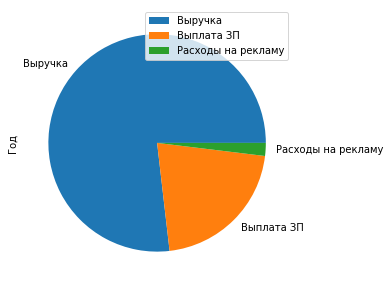

In [27]:
df = pd.DataFrame({'Год': [29497935.96, 8155442.75, 738720.0]},
                  index=['Выручка', 'Выплата ЗП', 'Расходы на рекламу'])
plot = df.plot.pie(y='Год', figsize=(5, 5))